## LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
- **destination:** No Urgent Place, Home, Work
- **passanger:** Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather:** Sunny, Rainy, Snowy
- **temperature:** 55, 80, 30
- **time:** 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon:** Restaurant(less then 20 USD), Coffee House, Carry out & Take away, Bar, Restaurant(20 USD-50 USD)
- **expiration:** 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender:** Female, Male
- **age:** 21, 46, 26, 31, 41, 50, 36
- **maritalStatus:** Unmarried partner, Single, Married partner, Divorced, Widowed
- **has_Children:** 1, 0
- **education:** Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- **occupation:** Unemployed, Architecture & Engineering, Student,
Education & Training & Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- **income:** 37500 - 49999, 62500 - 74999, 12500 - 24999, 75000 - 87499,
50000 - 62499, 25000 - 37499, 100000 or More, 87500 - 99999, Less than 12500
- **Bar:** never, less1, 1-3, gt8,  nan4-8 (feature meaning: how many times do you go to a bar every month?)
- **CoffeeHouse:** never, less1, 4-8, 1-3, gt8,  nan (feature meaning: how many times do you go to a coffeehouse every month?)
- **CarryAway:** n4-8, 1-3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
- **RestaurantLessThan20:** 4-8, 1-3, less1, gt8,  never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than 20 USD every month?)
- **Restaurant20To50:** 1-3, less1, never, gt8, 4-8,  nan (feature meaning: how many times do you go to a restaurant with average expense per person of 20 USD - 50 USD every month?)
- **toCoupon_GEQ15min:** 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
- **toCoupon_GEQ25min:** 0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
- **direction_same:** 0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- **direction_opp:** 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- **used:** was used, was not used

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
# Define the column names as a list
column_names = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
                'expiration', 'gender', 'age', 'marital-status', 'has-children',
                'education', 'occupation', 'income', 'car', 'bar', 'coffee-house', 'carry-away', 'restaurant<20', 'restaurant-20-50', 'coupon-5min', 'coupon-15min', 'coupon-25min', 'direction-same', 'direction-opp', 'used']

### 2. Load Dataset

In [4]:
dataset = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv", skiprows=1, names = column_names, sep = ",", skipinitialspace=True)
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital-status,...,coffee-house,carry-away,restaurant<20,restaurant-20-50,coupon-5min,coupon-15min,coupon-25min,direction-same,direction-opp,used
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [122]:
dataset['car'] = dataset['car'].fillna(0)
dataset['age'] = dataset['age'].replace({'below21': '21', '50plus': '50'})
dataset['age'] = dataset['age'].astype('int64')
dataset['used'] = dataset['used'].astype('int64')
dataset['used'] = dataset['used'].replace({0: 'was not used', 1: 'was used'})


In [123]:
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital-status,...,coffee-house,carry-away,restaurant<20,restaurant-20-50,coupon-5min,coupon-15min,coupon-25min,direction-same,direction-opp,used
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,was used
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,was not used
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,was used
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,was not used
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,was not used


In [124]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  12079
#Features =  26


In [125]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital-status,...,coffee-house,carry-away,restaurant<20,restaurant-20-50,coupon-5min,coupon-15min,coupon-25min,direction-same,direction-opp,used


In [126]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


Filtering missing values

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


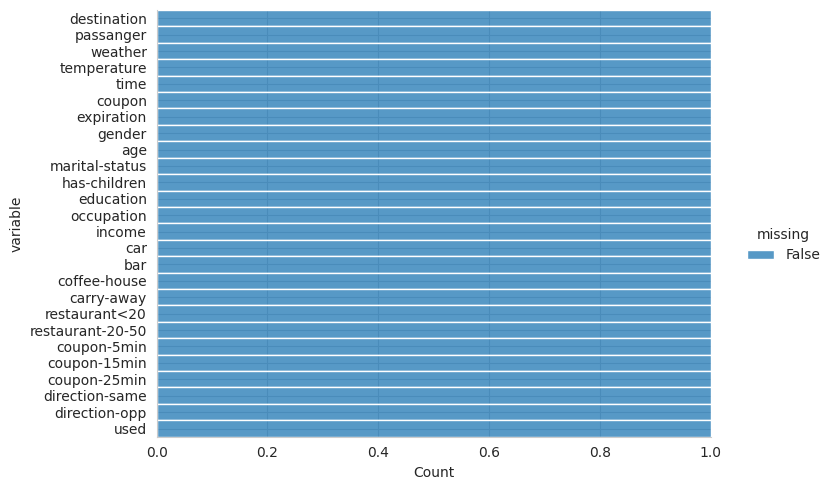

In [127]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [128]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  12079


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [129]:
# list of numerical variables
numerical_cols = ['temperature', 'age', 'has-children', 'coupon-5min', 'coupon-15min', 'coupon-25min', 'direction-same', 'direction-opp']


Histogram with Frequencies

In [130]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

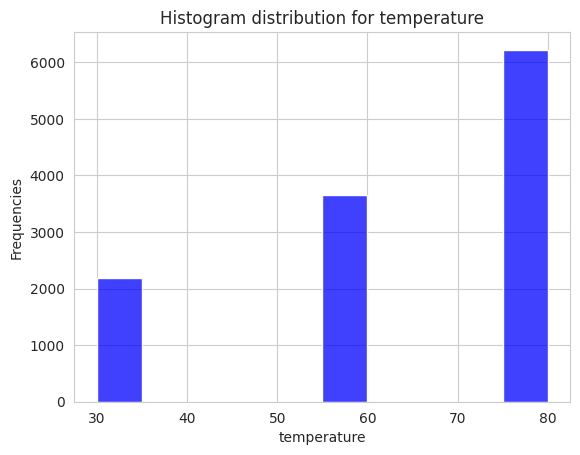

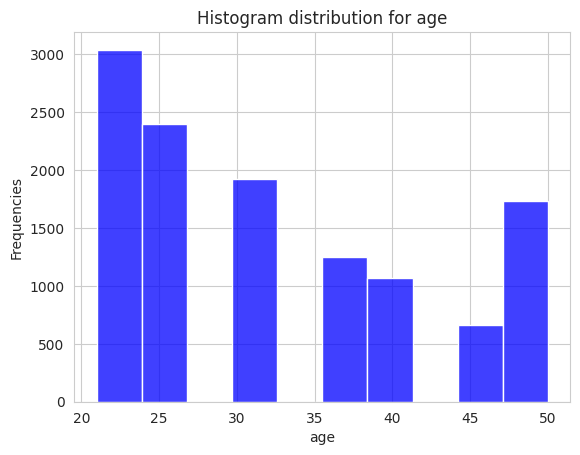

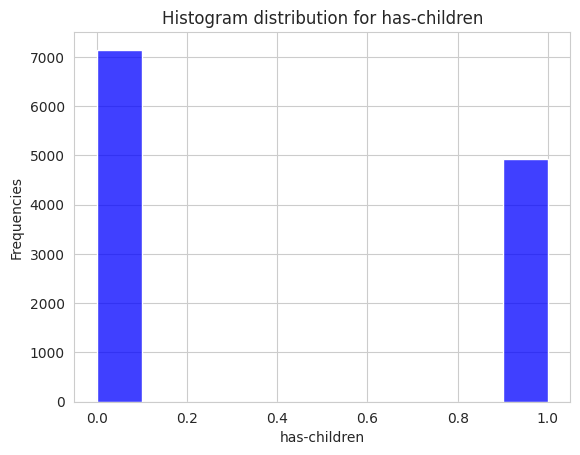

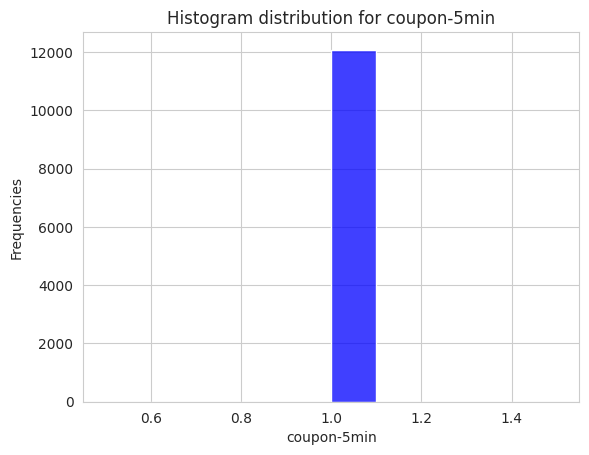

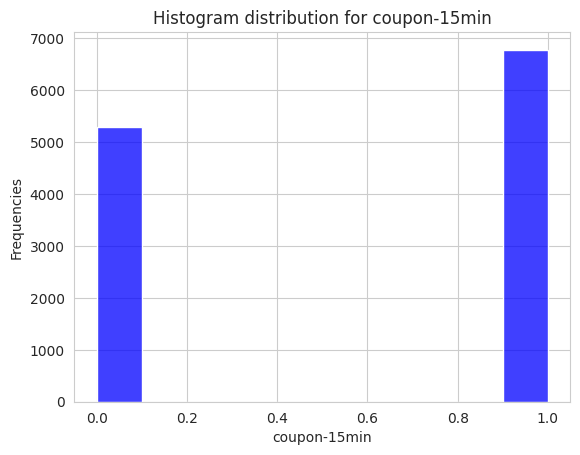

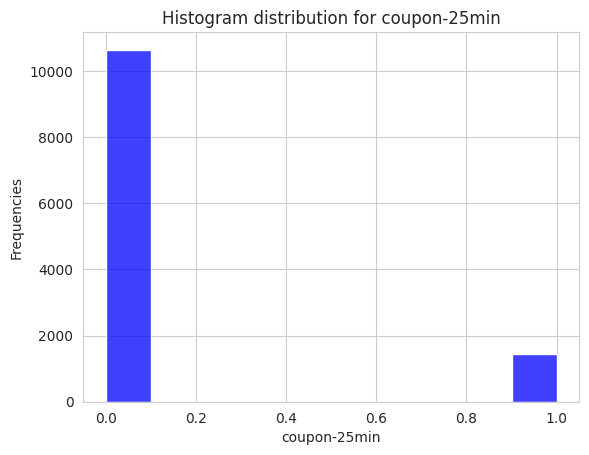

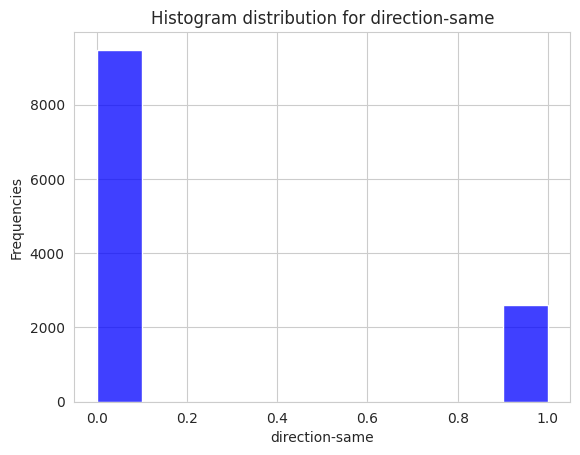

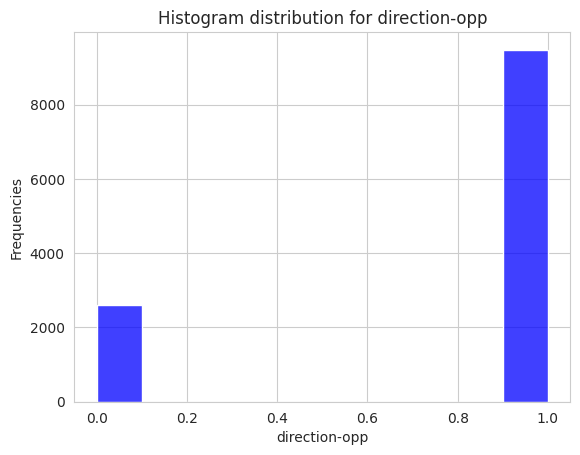

In [131]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

We made graphs showing the distribution of parameters by the number of respondents. Based on these graphs we can see that:
- 80 is the most common temperature
- the majority of respondents aged 20-25
- there are more respondents who do not have children than those who have children
- the fewest coupons are for places that take more than 25 minutes to get to
- most respondents travel in the opposite direction to the place indicated on the coupon

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [132]:
print(dataset.dtypes)


destination         object
passanger           object
weather             object
temperature          int64
time                object
coupon              object
expiration          object
gender              object
age                  int64
marital-status      object
has-children         int64
education           object
occupation          object
income              object
car                 object
bar                 object
coffee-house        object
carry-away          object
restaurant<20       object
restaurant-20-50    object
coupon-5min          int64
coupon-15min         int64
coupon-25min         int64
direction-same       int64
direction-opp        int64
used                object
dtype: object


In [133]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

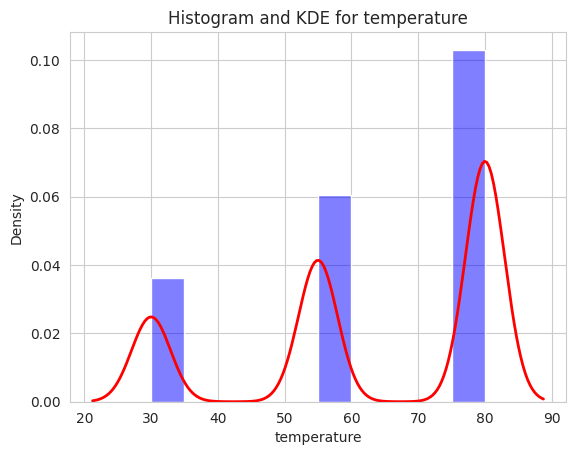

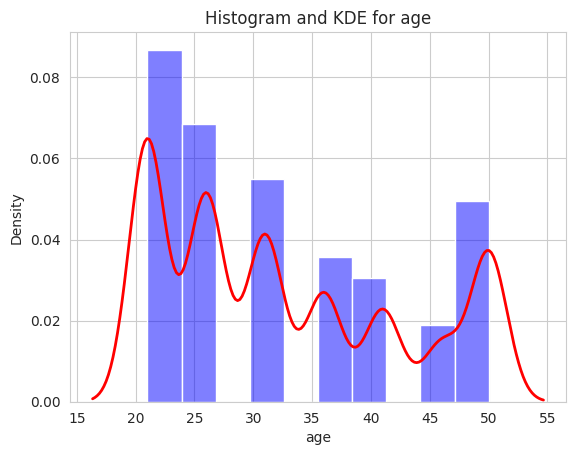

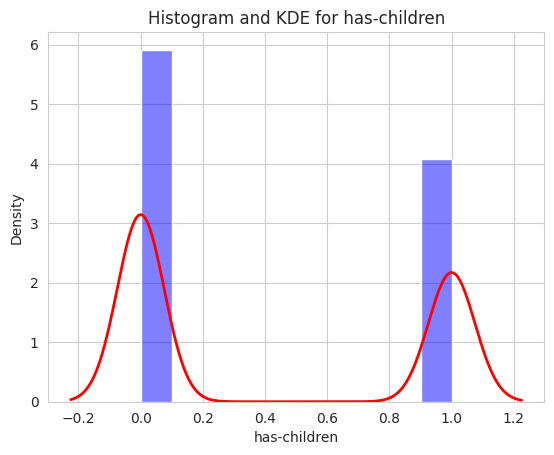

<ipython-input-133-73a94e7fe3da>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sbn.kdeplot(data[column], color = "red", linewidth = 2)


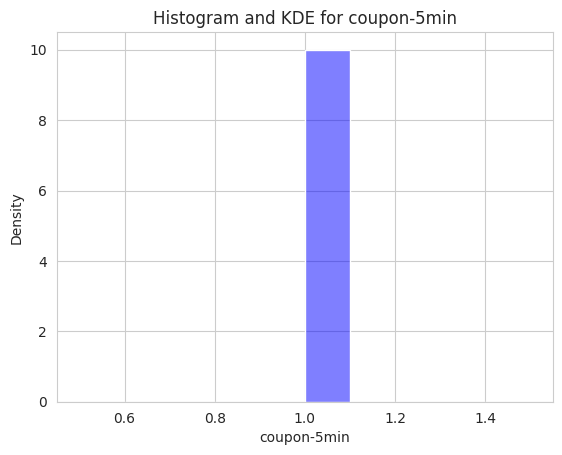

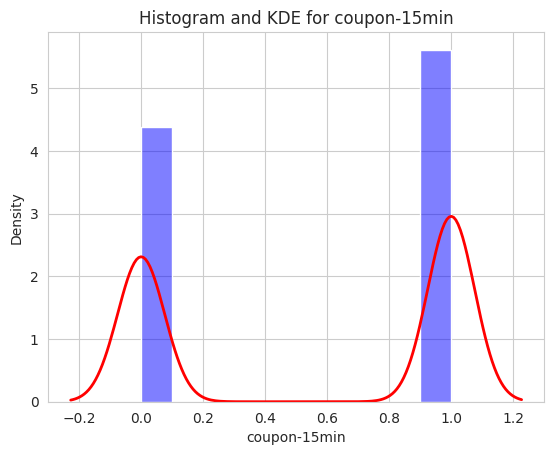

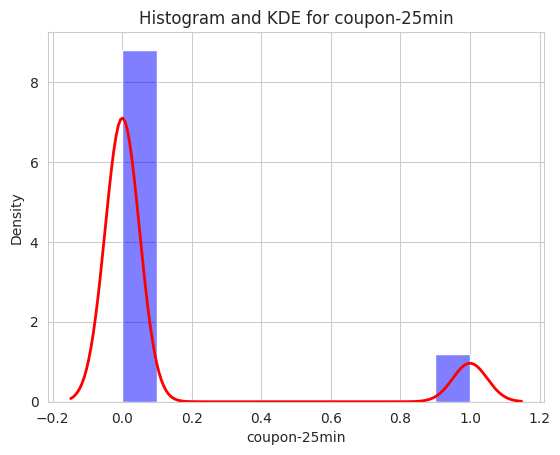

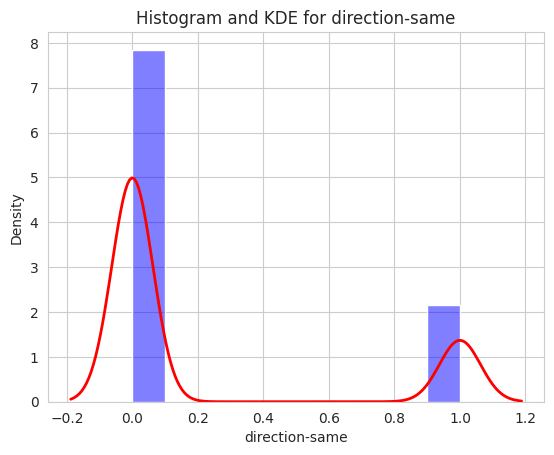

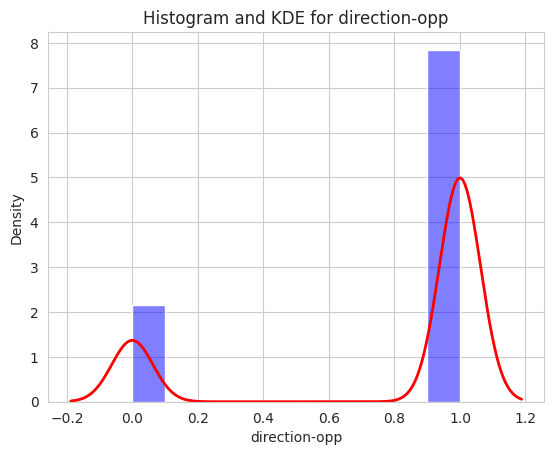

In [134]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(data=dataset, column=col, bins=10)

We see that the histograms do not exactly correspond to KDE, but in general the distributions of values ​​coincide and we can predict them.

Box Plot

In [135]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

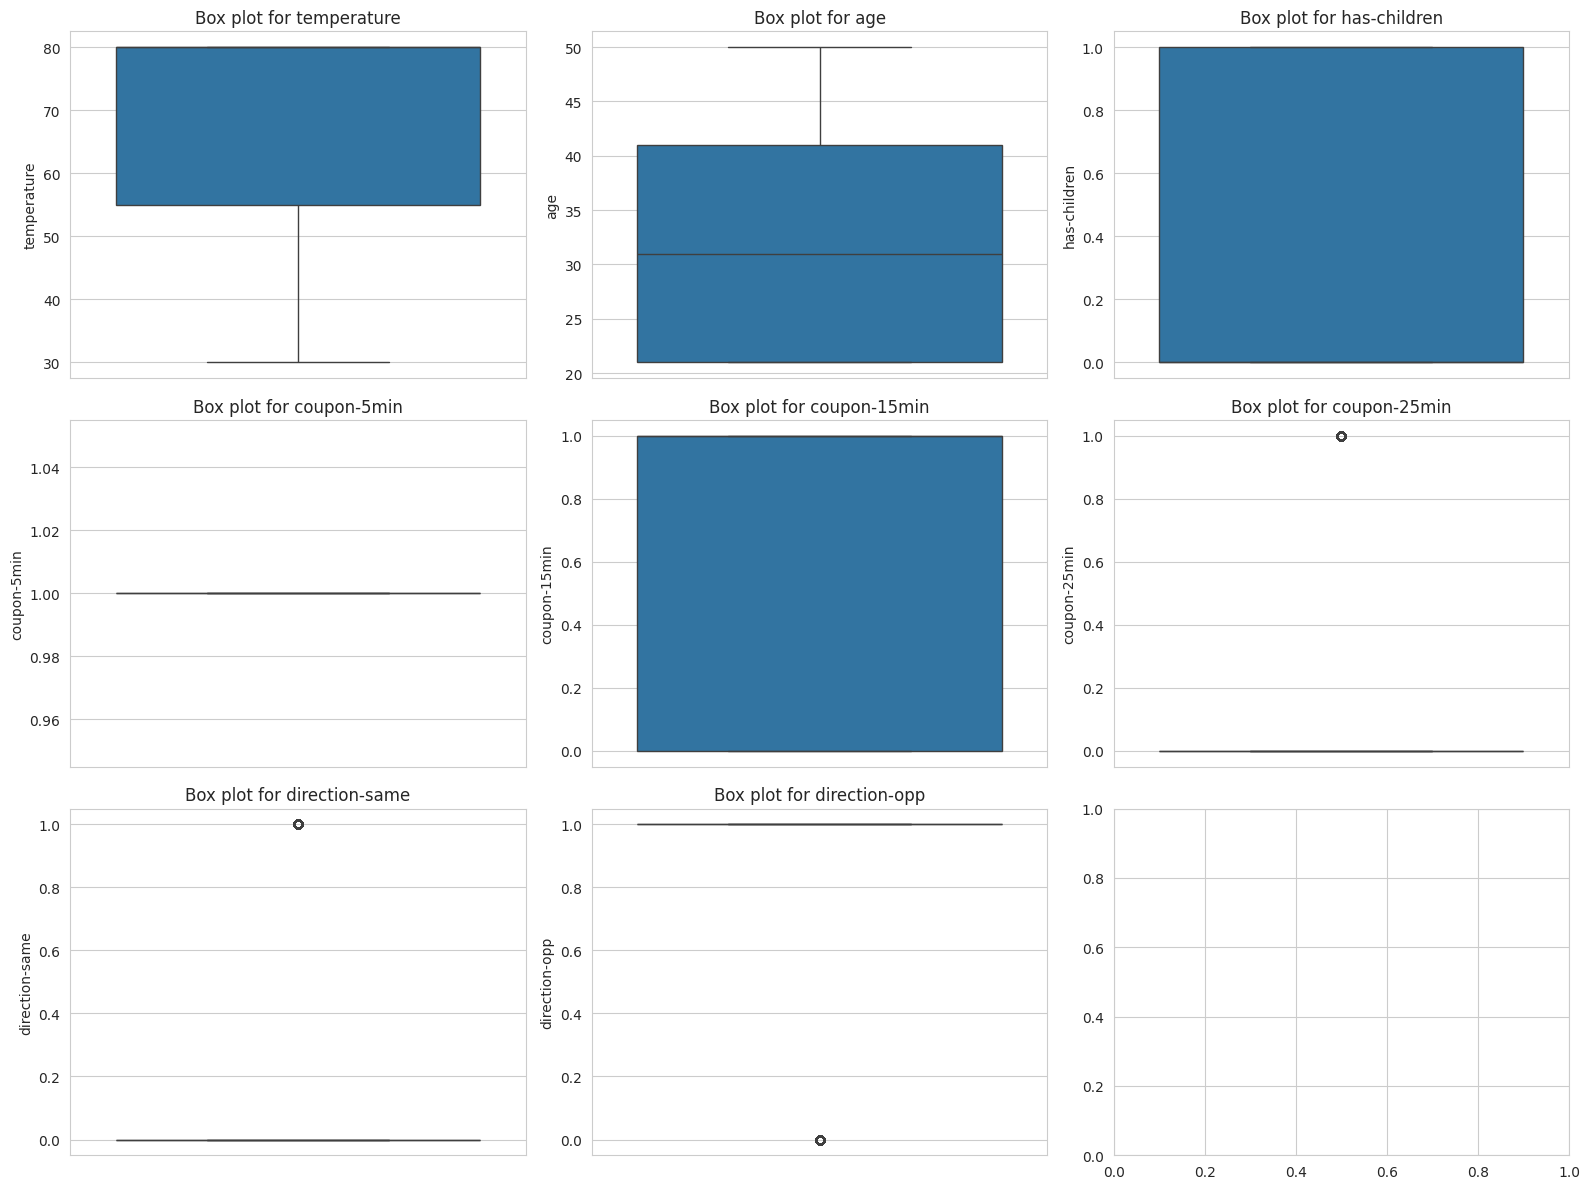

In [136]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

From the plotted bow graphs we see that:
- basically the temperature value is in the range from 55 to 80
- generally, age ranges from 21 to 41
- the ratio of the number of people with children to those without children is approximately equal


Statistical metrics

In [137]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,temperature,age,has-children,coupon-5min,coupon-15min,coupon-25min,direction-same,direction-opp
count,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,32.438695,0.408478,1.0,0.561222,0.119381,0.215167,0.784833
std,19.133246,10.179505,0.491573,0.0,0.496258,0.324249,0.410955,0.410955
min,30.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
50%,80.000000,31.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000
75%,80.000000,41.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000
max,80.000000,50.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [138]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

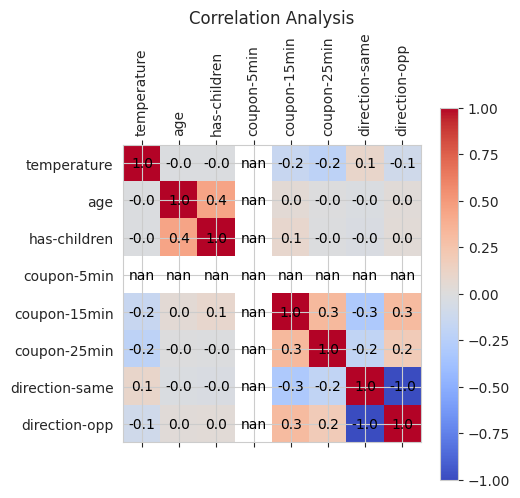

In [139]:
plot_correlation(dataset, numerical_cols)

- -1.0 - the same direction and the opposite - absolutely opposite values, do not correlate
- 0.0 - do not correlate, for example, the age of the respondent and the temperature outside on that day
- accordingly, values ​​from -1 to 1 show how correlated the values ​​are, for example, knowing a person’s age we have a chance to predict whether he has children

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other.
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy.
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions.
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model.

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

In [140]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)

    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

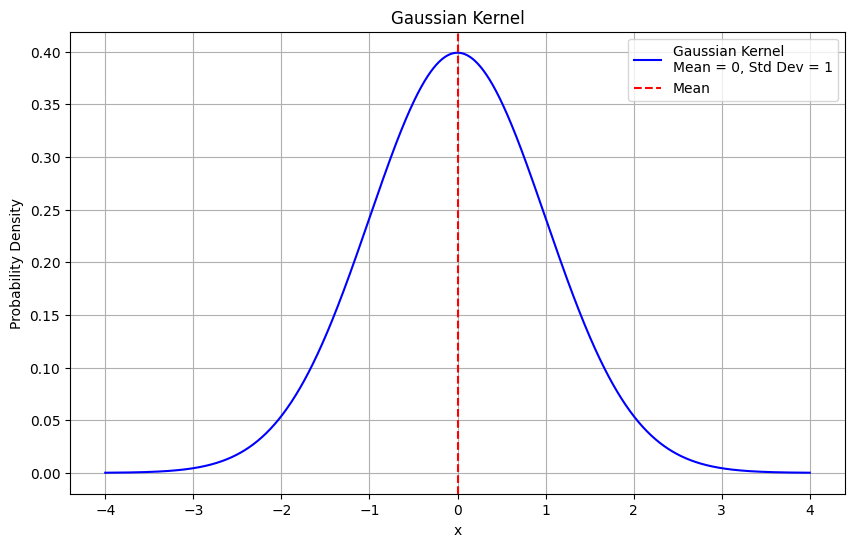

In [21]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [141]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [142]:
call_percentile(z = -2)

2.275

In [143]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [144]:
outliers_detection(dataset, "age").head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital-status,...,coffee-house,carry-away,restaurant<20,restaurant-20-50,coupon-5min,coupon-15min,coupon-25min,direction-same,direction-opp,used


In [145]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in temperature ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in age ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in has-children ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in coupon-5min ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in coupon-15min ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in coupon-25min ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in direction-same ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in direction-opp ***
#samples outlier to distribution = 0
%outliers = 0.0 %


#### Categorical Variables

In [146]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['destination',
 'expiration',
 'marital-status',
 'restaurant<20',
 'carry-away',
 'weather',
 'car',
 'income',
 'restaurant-20-50',
 'coffee-house',
 'passanger',
 'used',
 'coupon',
 'occupation',
 'bar',
 'time',
 'gender',
 'education']

Count instances for each categorical column

In [147]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** destination ******
destination
No Urgent Place    5970
Home               3085
Work               3024
Name: count, dtype: int64

***** expiration ******
expiration
1d    6760
2h    5319
Name: count, dtype: int64

***** marital-status ******
marital-status
Married partner      4831
Single               4588
Unmarried partner    2048
Divorced              504
Widowed               108
Name: count, dtype: int64

***** restaurant<20 ******
restaurant<20
1~3      5163
4~8      3450
less1    2005
gt8      1285
never     176
Name: count, dtype: int64

***** carry-away ******
carry-away
1~3      4502
4~8      4083
less1    1790
gt8      1573
never     131
Name: count, dtype: int64

***** weather ******
weather
Sunny    9601
Snowy    1331
Rainy    1147
Name: count, dtype: int64

***** car ******
car
0                                           11971
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                            

Bar chart - Analysis of absolute frequencies

In [148]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

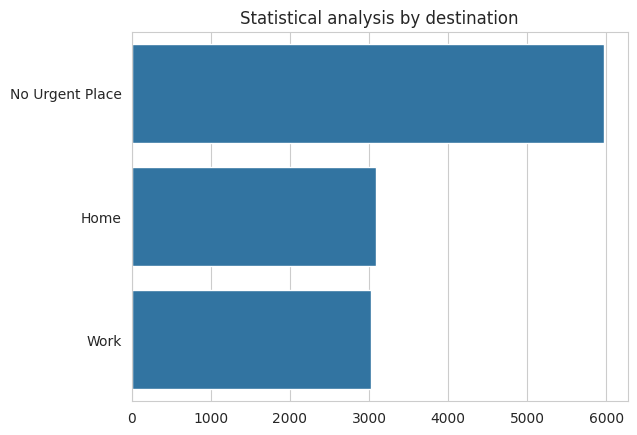

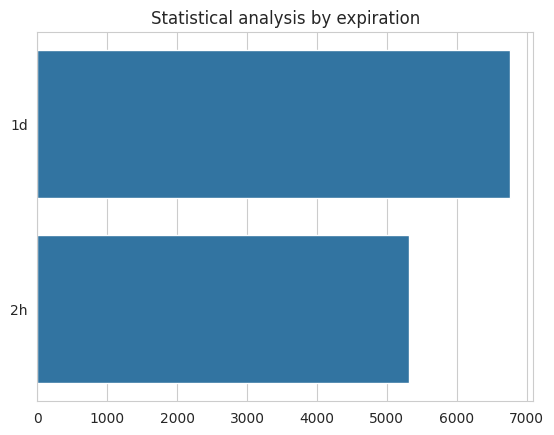

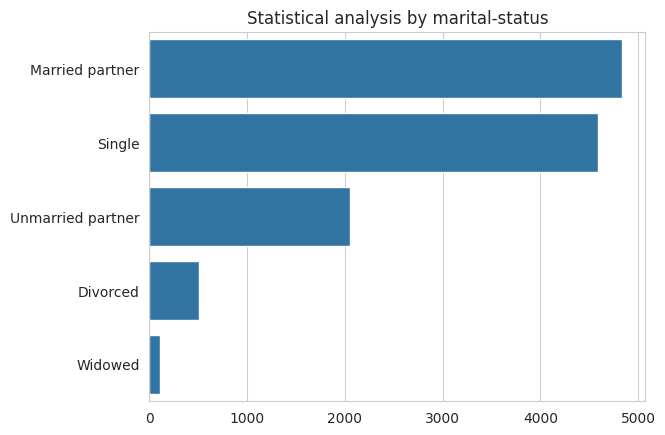

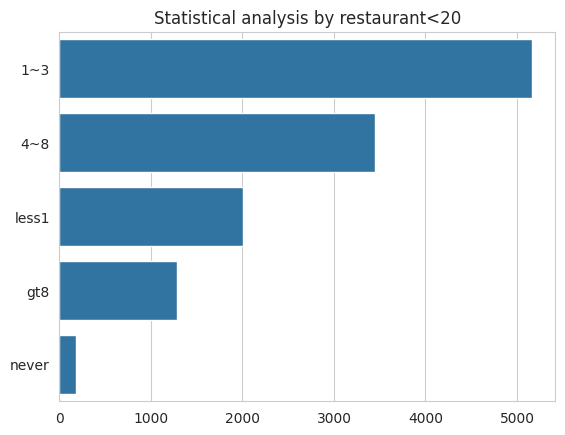

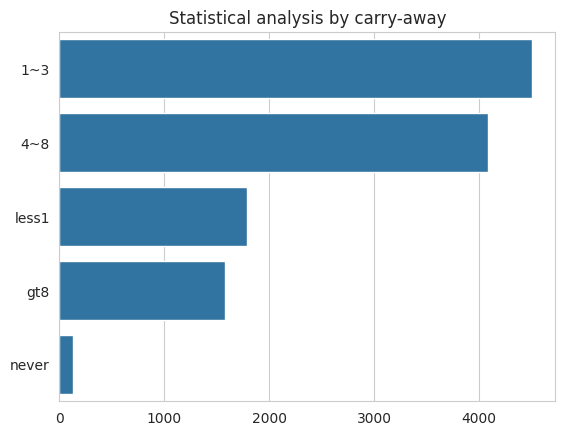

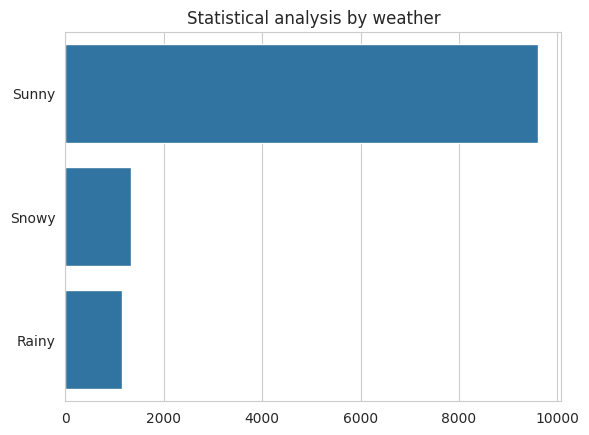

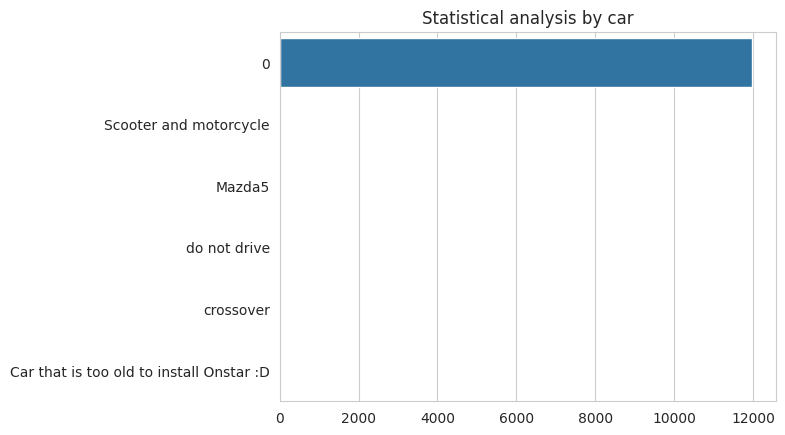

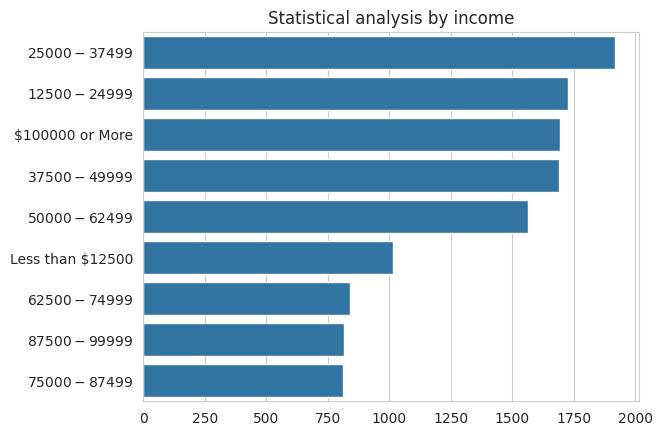

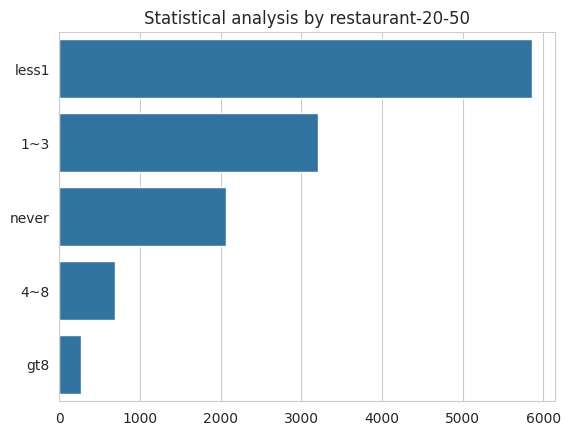

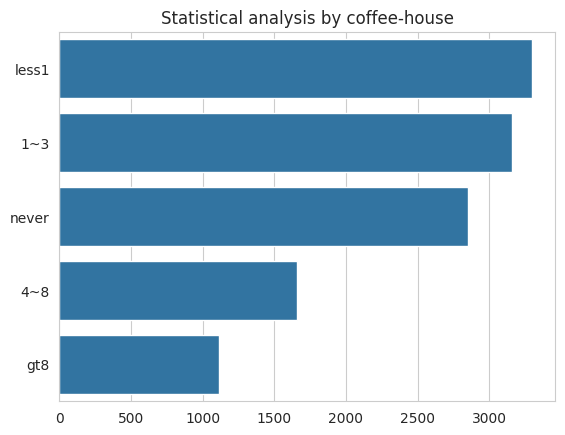

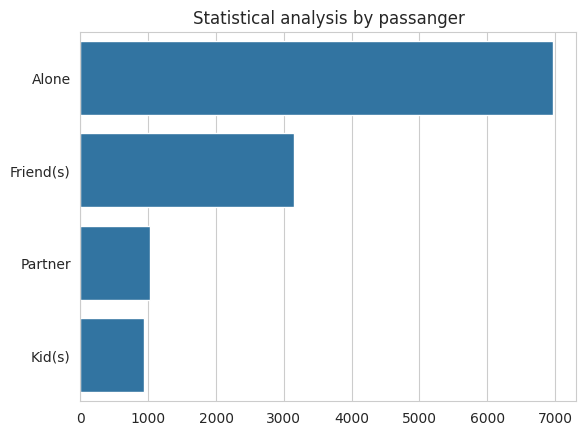

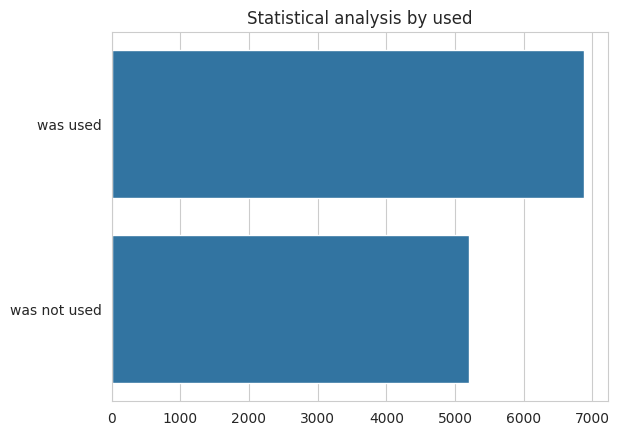

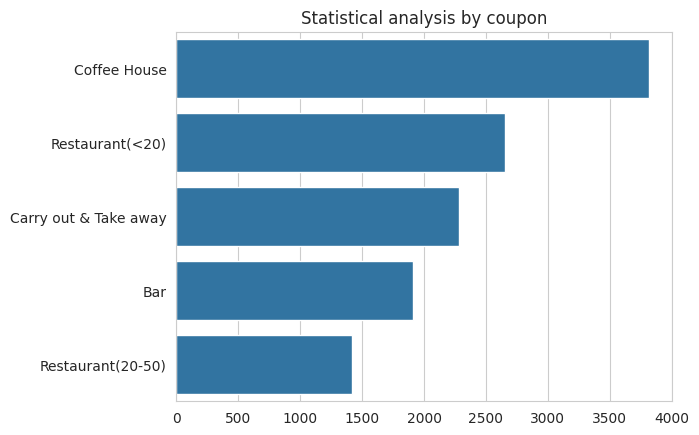

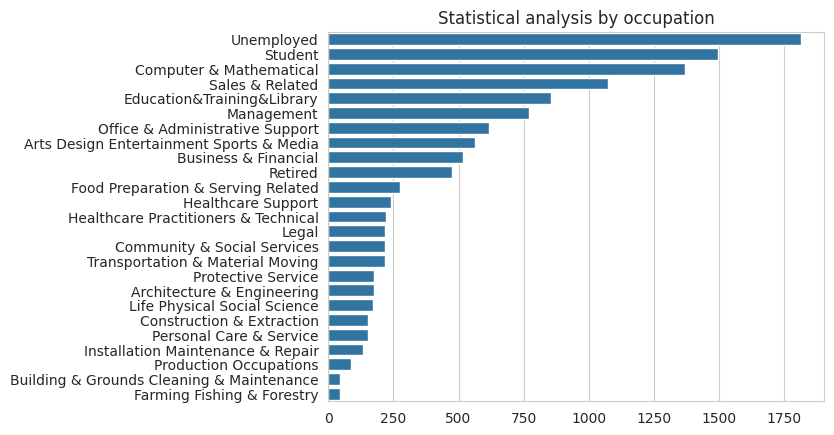

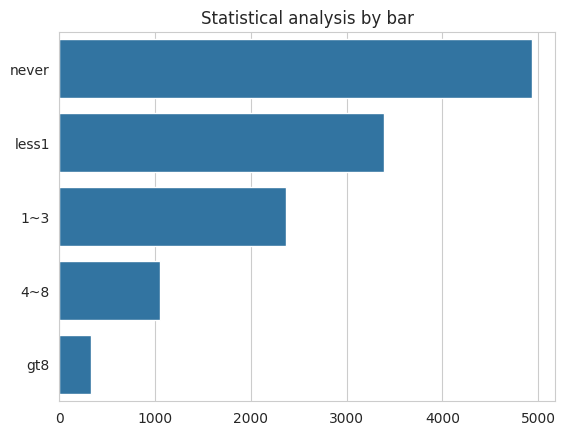

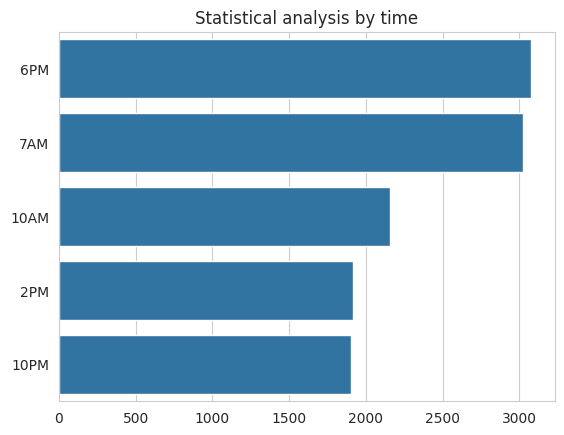

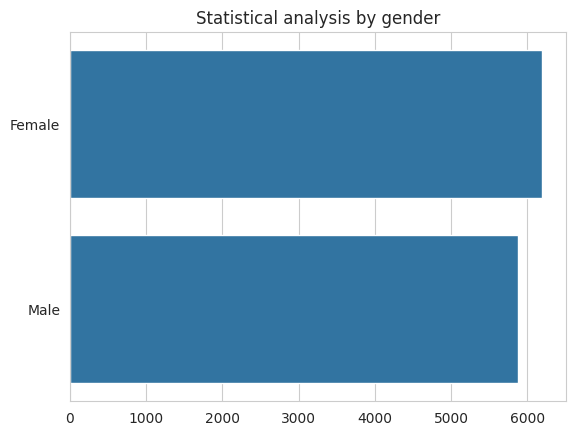

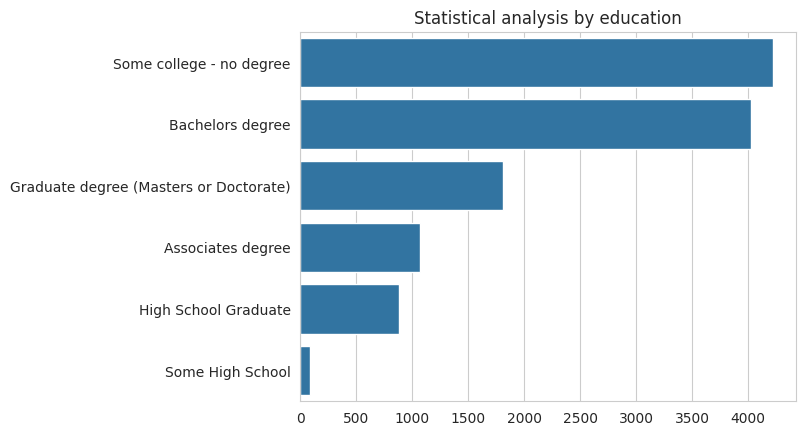

In [149]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

Using these graphs, we can also track the distribution of the number of respondents by category. For example, the vast majority do not have an advanced degree or have a bachelor's degree. Also most of the respondents were married or single, with an income of 25,000-37,500.

Pie Chart - Analysis of relative frequencies

In [150]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

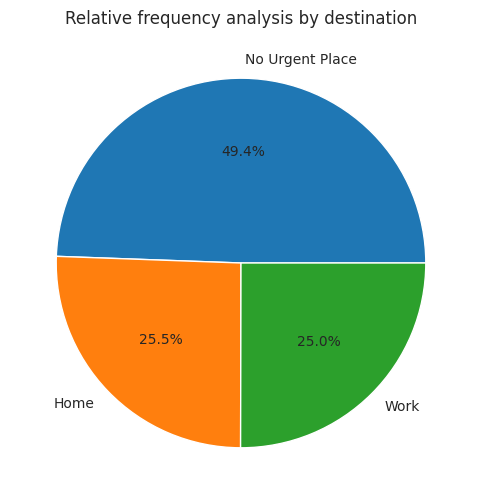

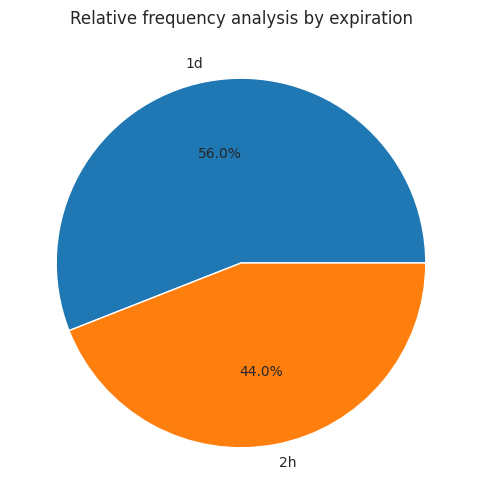

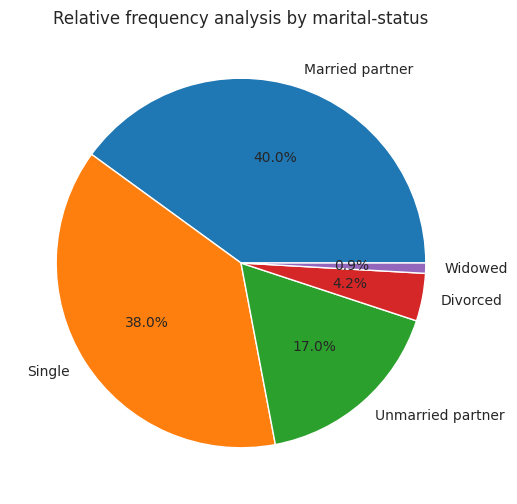

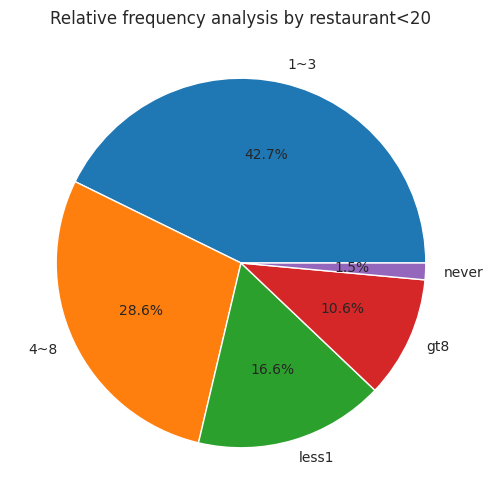

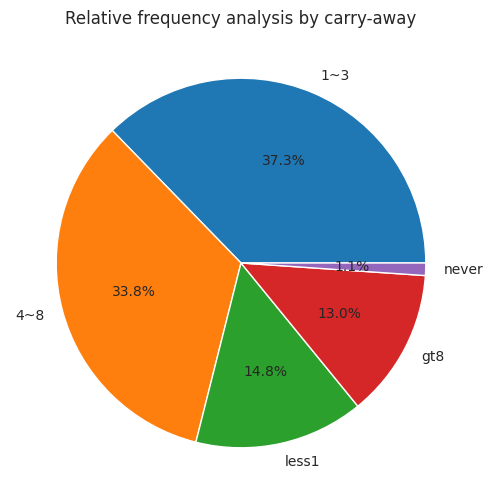

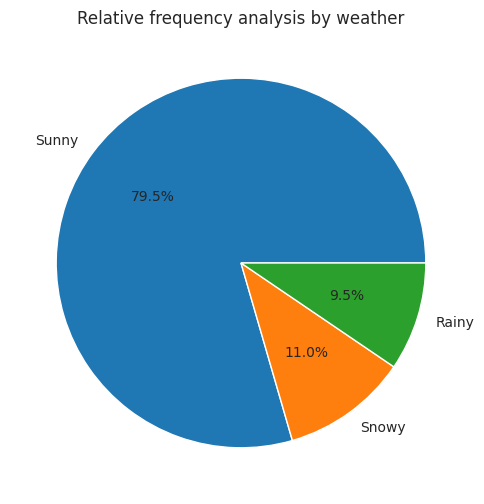

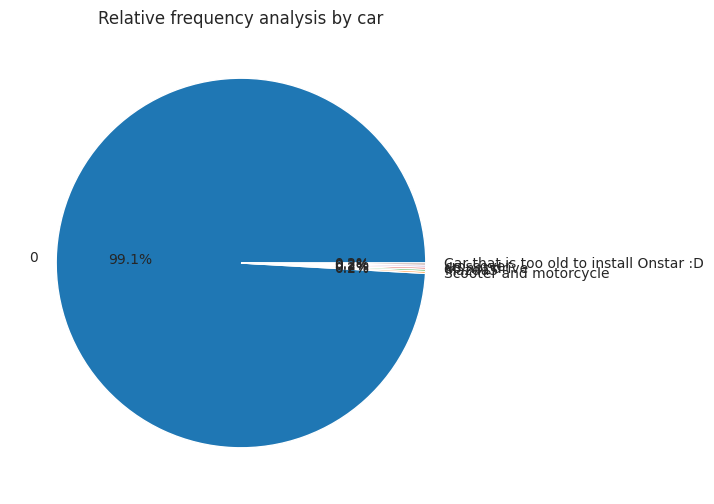

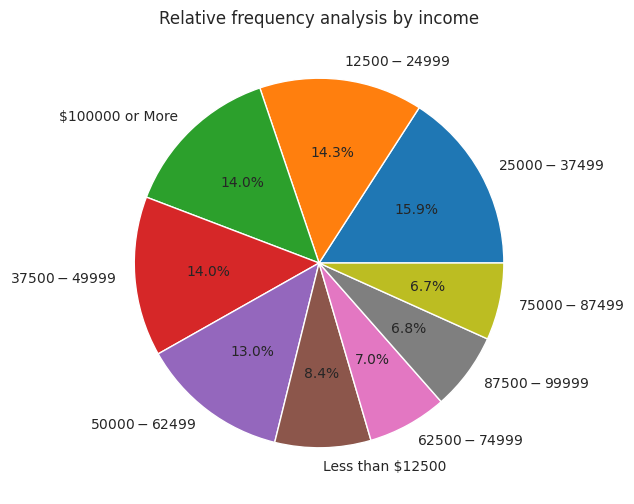

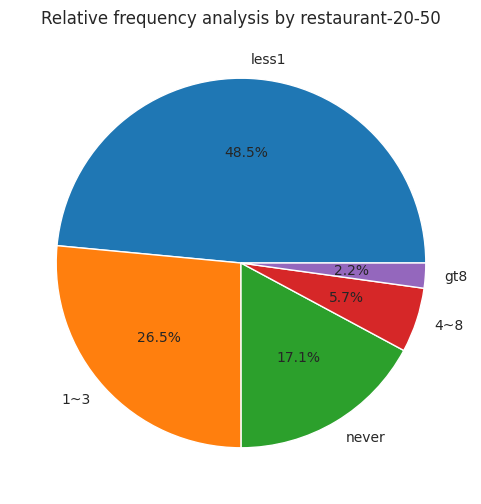

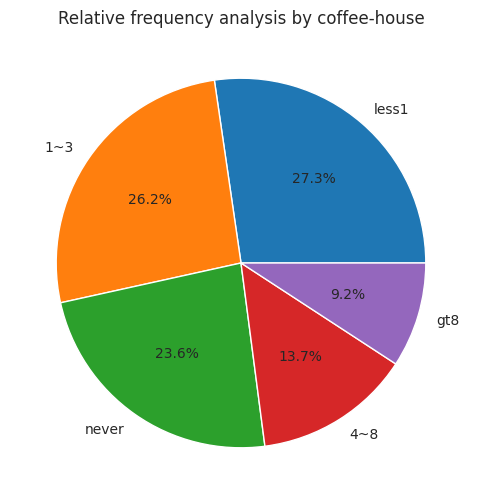

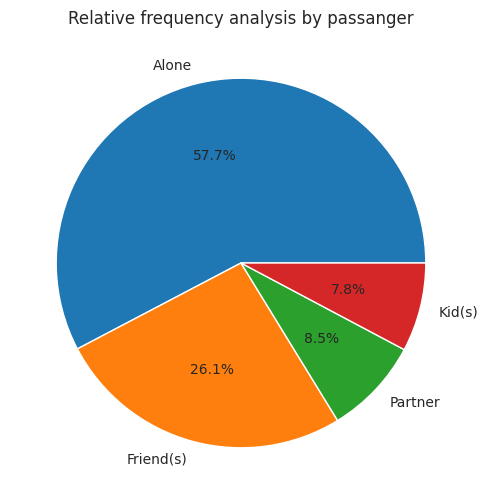

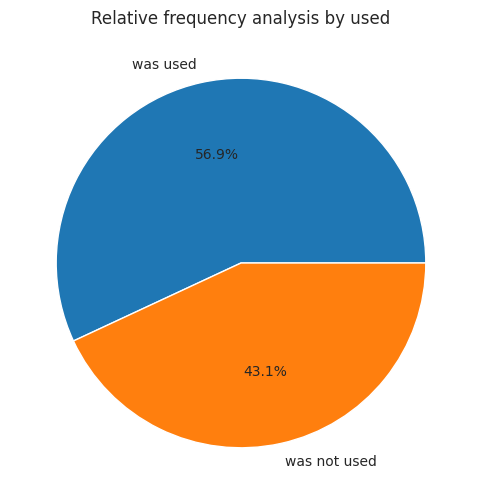

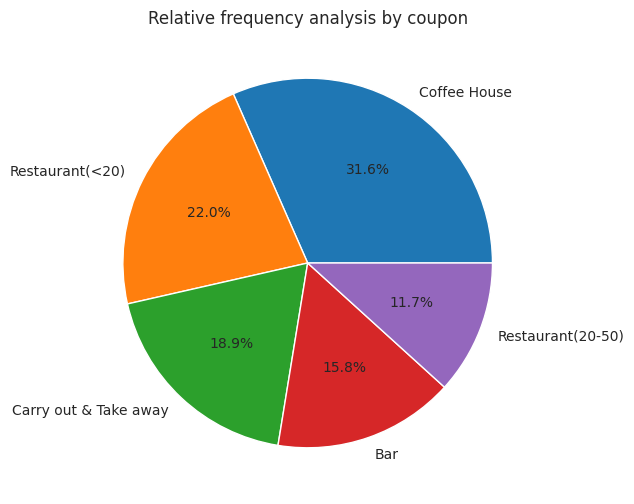

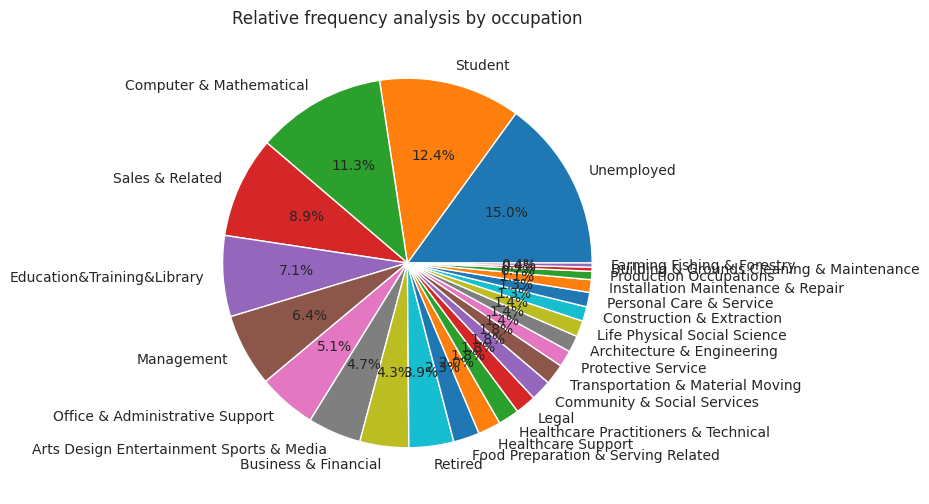

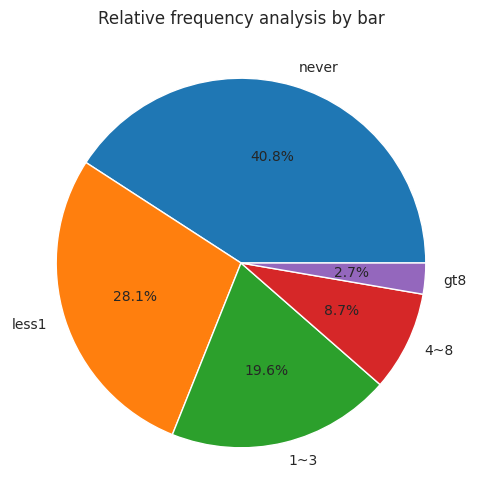

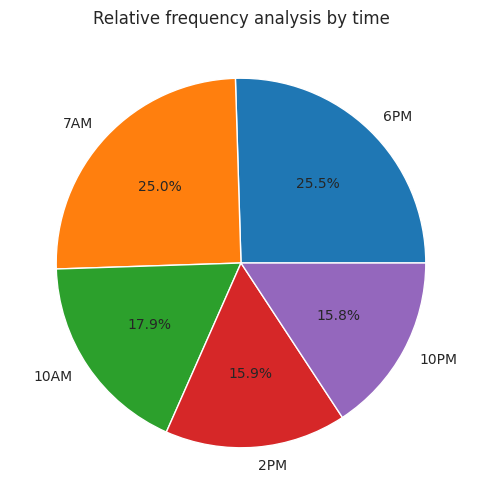

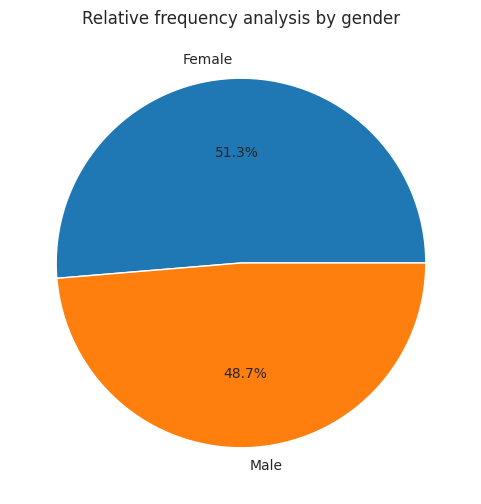

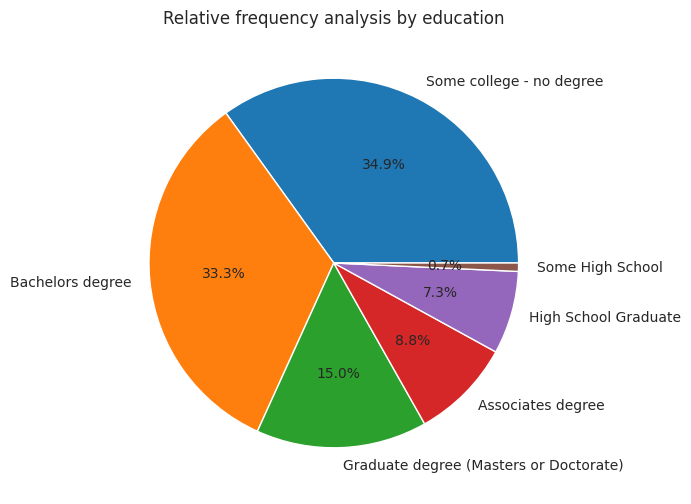

In [151]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

These pie charts display the same data as the previous graphs, but display it as a percentage. We can see that in most charts the data is distributed almost evenly.

Statistical Analysis for subgroups

In [177]:
# create groups organized by sex and income
group_used_gender = dataset.groupby(["used", "gender"]).size().reset_index(name = "samples")
print(group_used_gender)

           used  gender  samples
0  was not used  Female     2805
1  was not used    Male     2397
2      was used  Female     3394
3      was used    Male     3483


In [178]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Usage')
    plt.ylabel('Gender')
    plt.title('Bar Chart of Absolute Frequencies by Gender and Coupons Usage')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


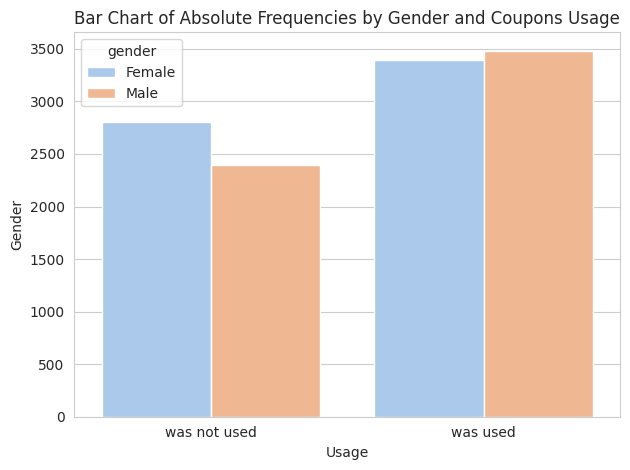

In [179]:
plot_absfreq_groups(group_used_gender, "used", "gender")

Coupons are used more often than not. Men use coupons more often than women.

In [161]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1].astype(str) + " by " + group[g2].astype(str)
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Gender and Coupones Usage')
    plt.show()



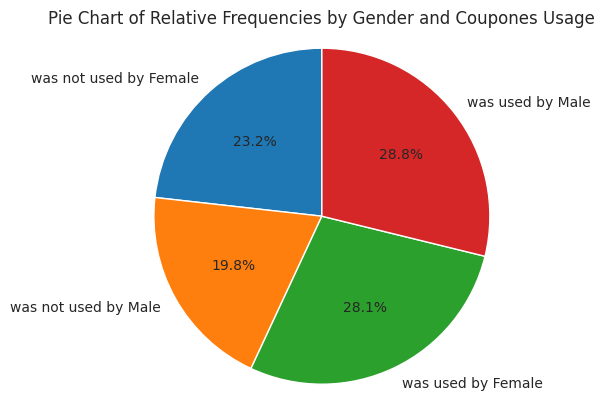

In [162]:
plot_relfreq_groups(group_used_gender, "used", "gender")

Same as in the previous chart. The data is distributed almost evenly.

In [183]:
# create groups organized by sex and income
group_used_coupon = dataset.groupby(["used", "coupon"]).size().reset_index(name = "samples")
print(group_used_coupon)

           used                 coupon  samples
0  was not used                    Bar     1125
1  was not used  Carry out & Take away      598
2  was not used           Coffee House     1922
3  was not used      Restaurant(20-50)      785
4  was not used        Restaurant(<20)      772
5      was used                    Bar      788
6      was used  Carry out & Take away     1682
7      was used           Coffee House     1894
8      was used      Restaurant(20-50)      632
9      was used        Restaurant(<20)     1881


In [184]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Usage')
    plt.ylabel('Coupons')
    plt.title('Bar Chart of Absolute Frequencies by Type of Coupons and Coupons Usage')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

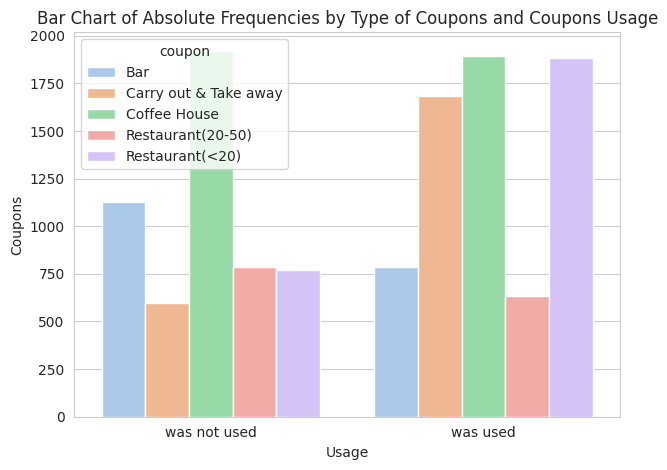

In [185]:
plot_absfreq_groups(group_used_coupon, "used", "coupon")

Coffee House coupons are the most frequently used of the possible categories, but these coupons are also most often not used compared to others. Carry Out and Take Away coupons and coupons to restaurants with an average bill of less than 20 USD are used much more often than not.

In [192]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g2].astype(str) + ' ' + group[g1].astype(str)
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Type of Coupons and Coupones Usage')
    plt.show()



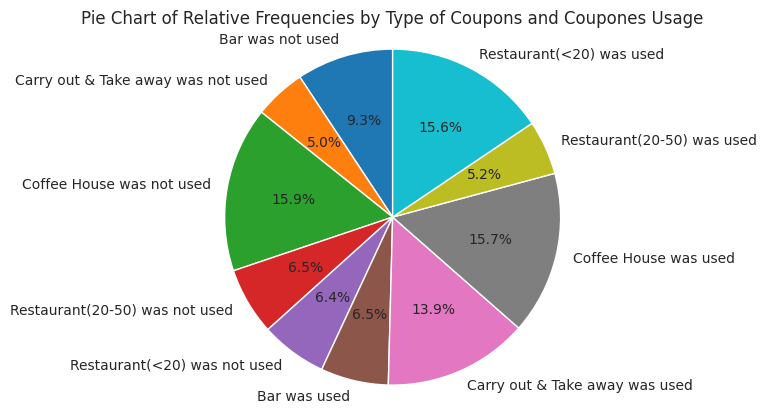

In [193]:
plot_relfreq_groups(group_used_gender, "used", "coupon")

The same data in percentage form. We see that most of the coupons have been used.